<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


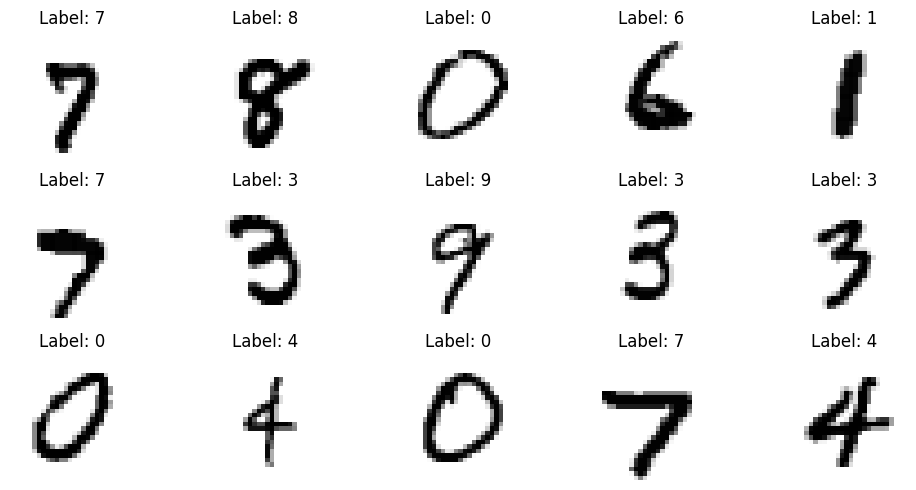

In [3]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
num_filter_1st = 5
num_filter_2nd = 10
iter = 1000

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter_1st,
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=1,
                     bias_initializer=Constant(0.2),
                     activation="relu",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter_2nd,
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=1,
                     bias_initializer=Constant(0.2),
                     activation ='relu'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
mnist_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 5)           │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 10)          │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
x_cnn = mnist_cnn.predict(x_train, batch_size=None, verbose="1", steps=iter, callbacks=None)

In [6]:
def plot_images(data, labels, nrows=0, images_per_row=0):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(nrows):
      for j in range(images_per_row):
        ax = axes[i*images_per_row + j]
        ax.set_title(('Label {}'.format(labels[i])))
        ax.imshow(data[i, :, :, j], cmap=matplotlib.cm.binary)
        #ax.set_title(f"Image {j+1}, Channel {i+1}")
        ax.axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

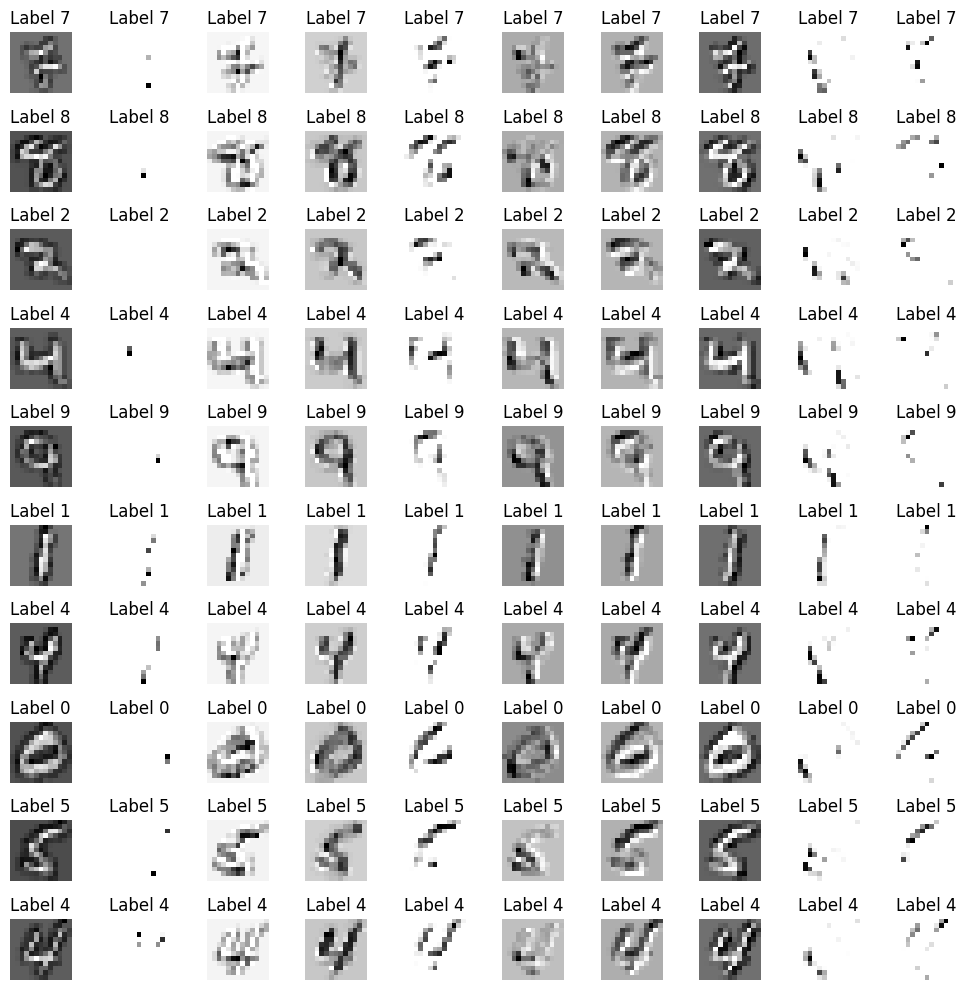

In [7]:
idx = np.random.randint(low=0, high=x_cnn.shape[0], size=(10,))
x_cnn_sampled = x_cnn[idx,:,:,:]
y_train_sampled = y_train[idx]
plot_images(x_cnn_sampled, y_train_sampled, x_cnn_sampled.shape[0], 10)

In [8]:
!pip install gudhi
import gudhi as gd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.8 MB/s eta 0:00:00


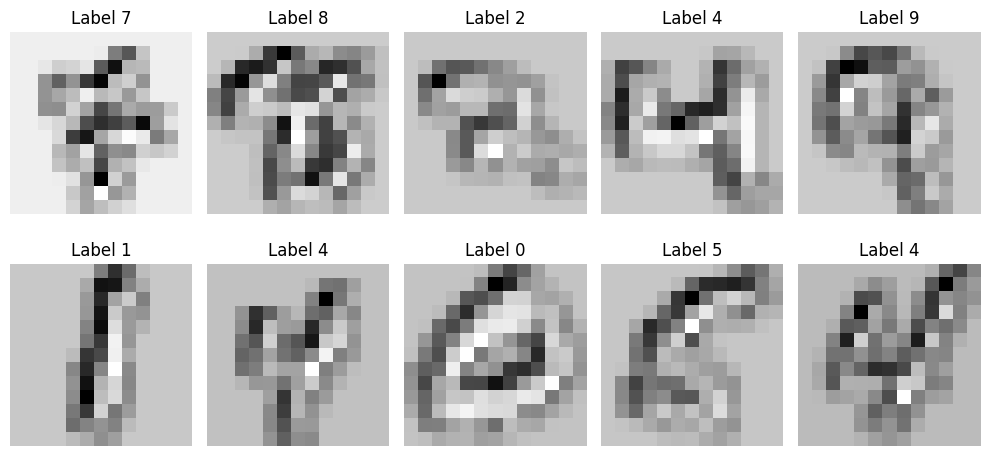

In [14]:
x_cnn_avg = np.mean(x_cnn, axis=3)
x_cnn_sampled_avg = x_cnn_avg[idx,:,:]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label {}'.format(y_train_sampled[i])))
    ax.imshow(x_cnn_sampled_avg[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

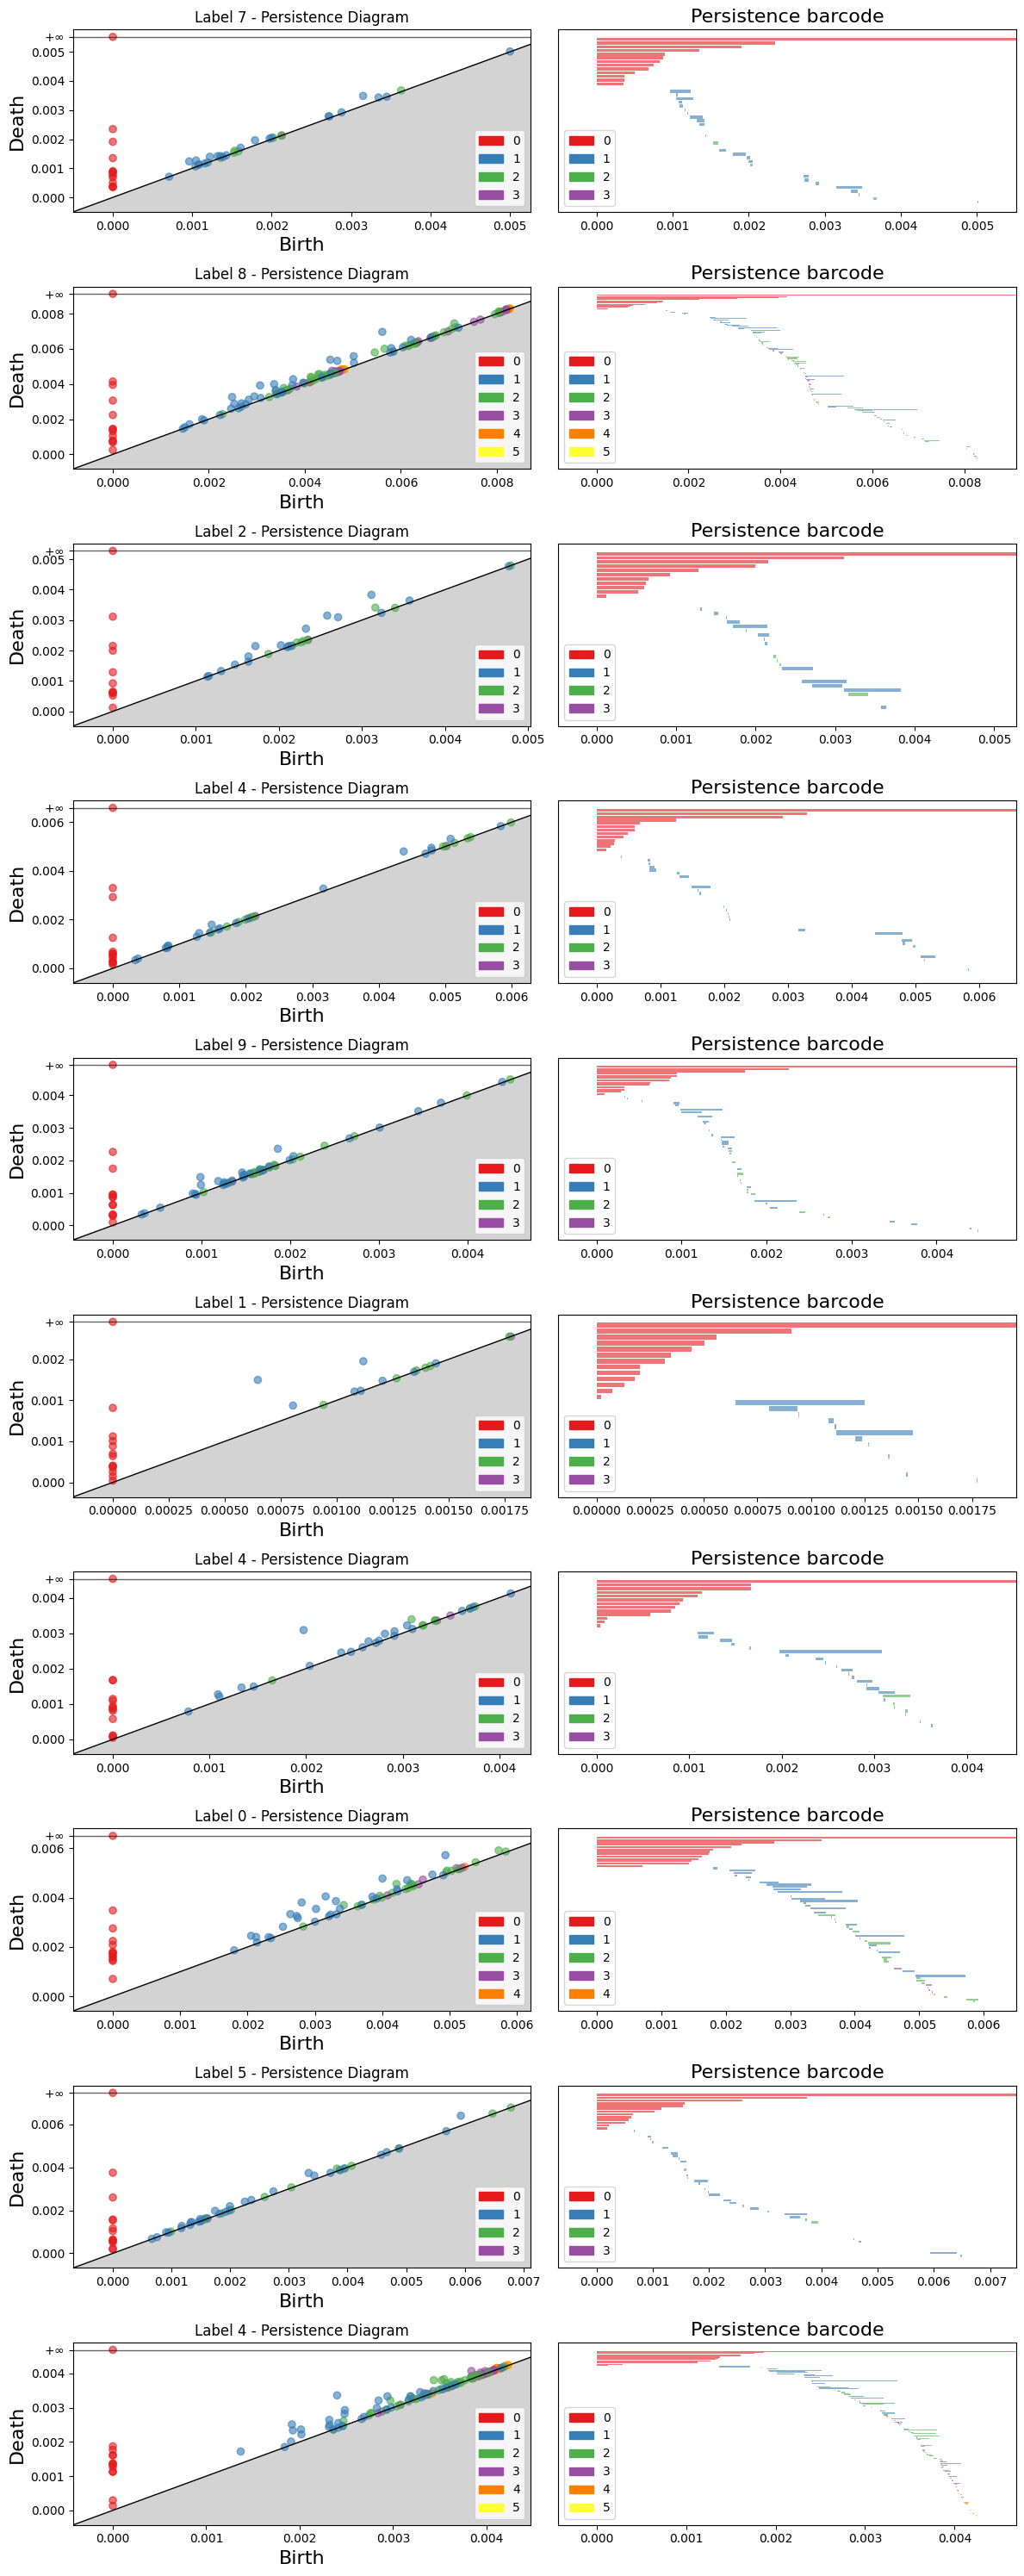

In [15]:
n_classes = x_cnn_sampled_avg.shape[0]
barcode_data = []

fig, ax = plt.subplots(n_classes, 2, figsize=(12, 3 * n_classes))  # 2 columns for diagrams and barcodes
for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    # plotting
    gd.plot_persistence_diagram(pers, axes=ax[i, 0])
    ax[i, 0].set_title('Label {} - Persistence Diagram'.format(y_train_sampled[i]))
    gd.plot_persistence_barcode(pers, axes=ax[i, 1])

    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

plt.tight_layout()
plt.show()

In [16]:
barcode_data

[[(3, (0.002126601608837983, 0.00212661915580267)),
  (2, (0.0015334121405958386, 0.001602774001121938))],
 [(5, (0.004839891833459544, 0.004848967462484164)),
  (5, (0.008290406917984178, 0.0082958727167135))],
 [(3, (0.0023527433927920073, 0.0023545702235976875)),
  (2, (0.0031622647139629796, 0.003410739555889821))],
 [(3, (0.0020925556570565366, 0.0020968635358411796)),
  (3, (0.005020389437827772, 0.005022390915702949))],
 [(3, (0.0015936750310603456, 0.0015979421135589303)),
  (3, (0.0017036575227981489, 0.0017070308776474387))],
 [(3, (0.0017787280445948424, 0.0017788199290850893)),
  (2, (0.001356973345505436, 0.001364932550415939))],
 [(3, (0.0034938069108778422, 0.003497948312355435)),
  (3, (0.003354833013503802, 0.0033553839470953205))],
 [(4, (0.0052248305119566895, 0.005249697208111617)),
  (3, (0.004602706387527697, 0.004732133216781094))],
 [(3, (0.0016167482606650777, 0.0016226149690692134)),
  (2, (0.0038203866224457224, 0.003941114035664455))],
 [(5, (0.0042445611417

In [17]:
!pip install nibabel
import nibabel